In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
# from numpy.random import seed
# seed(1)

# from tensorflow import random
# random.set_seed(2)

In [3]:
# load csv into dataframe
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

MSFT_open  MSFT_high  MSFT_low  MSFT_close  AMD_open  AMD_high  \
2010-06-29      24.13      24.20    23.110       23.31      7.93      7.93   
2010-06-30      23.30      23.68    22.950       23.01      7.58      7.65   
2010-07-01      23.09      23.32    22.730       23.16      7.35      7.53   
2010-07-02      23.36      23.48    23.050       23.27      7.45      7.48   
2010-07-06      23.70      24.09    23.584       23.82      7.40      7.42   

            AMD_low  AMD_close  TSLA_open  TSLA_high  ...  JNJ_low  JNJ_close  \
2010-06-29     7.41       7.48      19.00    25.0000  ...   58.680      59.24   
2010-06-30     7.30       7.32      25.79    30.4192  ...   58.940      59.06   
2010-07-01     7.10       7.39      25.00    25.9200  ...   58.650      59.07   
2010-07-02     7.02       7.17      23.00    23.1000  ...   58.850      59.08   
2010-07-06     6.96       7.04      20.00    20.0000  ...   58.669      59.08   

            REGN_open  REGN_high  REGN_low  REGN_close  GILD_open  GILD_high  \
2010-06-29      23.67      23.95     22.86       22.98      35.40      35.61   
2010-06-30      23.05      23.47     22.32       22.32      34.83      35.13   
2010-07-01      22.31      22.37     20.45       20.79      34.24      34.27   
2010-07-02      21.06      21.88     20.75       21.61      34.38      35.16   
2010-07-06      22.03      22.03     21.16       21.36      35.11      35.42   

            GILD_low  GILD_close  
2010-06-29    34.740       34.97  
2010-06-30    34.260       34.28  
2010-07-01    33.300       34.14  
2010-07-02    34.180       34.87  
2010-07-06    34.415       34.77  

[5 rows x 24 columns]

In [4]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AMD_open',
    'AMD_high',
    'AMD_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

MSFT_close  AMD_close  TSLA_close  JNJ_close  REGN_close  \
2010-06-29       23.31       7.48       23.89      59.24       22.98   
2010-06-30       23.01       7.32       23.83      59.06       22.32   
2010-07-01       23.16       7.39       21.96      59.07       20.79   
2010-07-02       23.27       7.17       19.20      59.08       21.61   
2010-07-06       23.82       7.04       16.11      59.08       21.36   

            GILD_close  
2010-06-29       34.97  
2010-06-30       34.28  
2010-07-01       34.14  
2010-07-02       34.87  
2010-07-06       34.77

In [5]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

window size: 1
stock: MSFT_close
dropout fraction: 0.1
MSE:3124.017465312345
RMSE:55.89291068921304
window size: 1
stock: MSFT_close
dropout fraction: 0.15
MSE:3896.9926032036324
RMSE:62.42589689546825
window size: 1
stock: MSFT_close
dropout fraction: 0.2
MSE:4062.4837854345524
RMSE:63.73761672226655
window size: 1
stock: MSFT_close
dropout fraction: 0.25
MSE:3898.5197912626622
RMSE:62.438127704653844
window size: 1
stock: MSFT_close
dropout fraction: 0.3
MSE:6320.595798564109
RMSE:79.50217480398953
window size: 1
stock: MSFT_close
dropout fraction: 0.35
MSE:4899.965810332354
RMSE:69.99975578766224
window size: 5
stock: MSFT_close
dropout fraction: 0.1
MSE:3137.5204101333593
RMSE:56.01357344549051
window size: 5
stock: MSFT_close
dropout fraction: 0.15
MSE:3424.7739220294707
RMSE:58.521568007269515
window size: 5
stock: MSFT_close
dropout fraction: 0.2
MSE:3846.154317958713
RMSE:62.017371098416554
window size: 5
stock: MSFT_close
dropout fraction: 0.25
MSE:3966.877995194899
RMSE:62.98

/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.25
MSE:6333.323229218922
RMSE:79.58217909317966


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.3
MSE:4387.674377414937
RMSE:66.23952277466178


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.35
MSE:6307.108938081447
RMSE:79.41730880659107


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.1
MSE:3360.062933188443
RMSE:57.96604983253942


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.15
MSE:3172.1180242238315
RMSE:56.3215591423376


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.2
MSE:3478.4970526637203
RMSE:58.978784767607074


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.25
MSE:4237.443343220502
RMSE:65.09564765190144


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.3
MSE:4120.105210519273
RMSE:64.18804569792785


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.35
MSE:4562.117869928716
RMSE:67.54345171760706


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.1
MSE:3385.8237309608176
RMSE:58.18783146810695


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.15
MSE:3711.5933566839744
RMSE:60.92284757530605


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.2
MSE:3968.1416489787302
RMSE:62.993187321953556


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.25
MSE:3901.769078810322
RMSE:62.4641423443108


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.3
MSE:4061.0737573597903
RMSE:63.726554569973345


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.35
MSE:4203.299044964226
RMSE:64.83285467233588


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.1
MSE:3356.2057626596634
RMSE:57.93276933359619


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.15
MSE:4321.7885632950965
RMSE:65.74031155459409


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.2
MSE:3797.4214150909233
RMSE:61.62322139494919


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.25
MSE:3993.5074583461474
RMSE:63.19420430977945


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.3
MSE:4041.3879883132417
RMSE:63.57191194476726


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.35
MSE:4142.819454304024
RMSE:64.36473766204617


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.1
MSE:238.20215569294598
RMSE:15.433799133490949


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.15
MSE:218.01764133342317
RMSE:14.765420459080167


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.2
MSE:274.1097940508009
RMSE:16.5562614756714


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.25
MSE:637.8671715835723
RMSE:25.256032380078473


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.3
MSE:482.56889981110186
RMSE:21.967450917461996


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.35
MSE:440.4097856918689
RMSE:20.98594257334821


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.1
MSE:285.7646454060831
RMSE:16.90457468870729


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.15
MSE:326.5646217923694
RMSE:18.07109907538469


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.2
MSE:418.9392882048864
RMSE:20.46800645409529


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.25
MSE:314.86131529141886
RMSE:17.74433192012083


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.3
MSE:360.53800959476143
RMSE:18.987838465574786


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.35
MSE:401.63273834997403
RMSE:20.040776889880643


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.1
MSE:313.36905458141956
RMSE:17.702233039405495


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.15
MSE:318.8504655791485
RMSE:17.85638444868245


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.2
MSE:262.31584648906664
RMSE:16.196167648214395


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.25
MSE:290.2815990121706
RMSE:17.037652391458472


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.3
MSE:339.6022993141686
RMSE:18.42830158517514


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.35
MSE:375.6120203934241
RMSE:19.3807125873489


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.1
MSE:314.3104722080975
RMSE:17.728803462391294


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.15
MSE:642.1328651610481
RMSE:25.340340667817554


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.2
MSE:351.3846509432926
RMSE:18.74525675853208


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.25
MSE:229.4984832703285
RMSE:15.149207347921822


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.3
MSE:388.09859571534525
RMSE:19.700218164156084


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.35
MSE:628.4168920112505
RMSE:25.0682446934613


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.1
MSE:383.1816082665805
RMSE:19.57502511534993


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.15
MSE:334.95819372161094
RMSE:18.301863121595325


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.2
MSE:300.3286693983194
RMSE:17.329993346747695


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.25
MSE:358.4830884802082
RMSE:18.93364963445263


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.3
MSE:396.4442357470136
RMSE:19.910907456643294


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.35
MSE:648.0574153927731
RMSE:25.456971842557653


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.1
MSE:216.51760013808644
RMSE:14.71453703444612


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.15
MSE:296.0175234215917
RMSE:17.20515979064396


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.2
MSE:646.0921471255359
RMSE:25.418342729720518


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.25
MSE:403.00751182844186
RMSE:20.075046994426735


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.3
MSE:364.1129932866107
RMSE:19.081745027292726


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.35
MSE:405.1226341145
RMSE:20.127658435955734


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.1
MSE:249.32726517665867
RMSE:15.790100226935188


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.15
MSE:366.85183286907267
RMSE:19.153376539635843


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.2
MSE:642.6319653231664
RMSE:25.35018669207717


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.25
MSE:352.9121496916763
RMSE:18.78595618252306


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.3
MSE:302.98977400726295
RMSE:17.40660144908428


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.35
MSE:357.8889471674507
RMSE:18.91795303851478


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.1
MSE:31186.9294721258
RMSE:176.59821480447022


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.15
MSE:34752.352541231885
RMSE:186.4198287233198


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.2
MSE:47796.08608806435
RMSE:218.62315999926528


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.25
MSE:43650.59692987396
RMSE:208.92725272178822


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.3
MSE:46979.580452553935
RMSE:216.7477345961289


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.35
MSE:53177.61770246592
RMSE:230.60272700570113


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.1
MSE:32896.70265415434
RMSE:181.3744818163634


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.15
MSE:37098.95094993287
RMSE:192.61087962504317


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.2
MSE:68854.79354443299
RMSE:262.40196939892235


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.25
MSE:53261.13246397749
RMSE:230.78373526740893


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.3
MSE:49492.91938246481
RMSE:222.4700415392257


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.35
MSE:43648.00613155971
RMSE:208.92105238955625


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.1
MSE:16827.599746464835
RMSE:129.72123860981608


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.15
MSE:35790.60683987705
RMSE:189.18405545890238


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.2
MSE:37674.36643624546
RMSE:194.0988573800615


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.25
MSE:45421.52148973331
RMSE:213.12325422096322


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.3
MSE:33081.66749575712
RMSE:181.88366473039056


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.35
MSE:51013.057697253425
RMSE:225.86070419011233


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.1
MSE:66722.79248643368
RMSE:258.30755406382076


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.15
MSE:33303.39659450892
RMSE:182.49218228326637


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.2
MSE:33368.045491081524
RMSE:182.66922425816978


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.25
MSE:68507.11892429562
RMSE:261.7386462185048


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.3
MSE:52544.57275008012
RMSE:229.2260298266323


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.35
MSE:44201.15431269631
RMSE:210.2407056511567


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.1
MSE:19338.001066641584
RMSE:139.06114146892935


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.15
MSE:67237.48514248236
RMSE:259.30191889471695


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.2
MSE:36152.95855246392
RMSE:190.13931353737428


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.25
MSE:35432.62987211968
RMSE:188.23557015643902


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.3
MSE:42791.18577253456
RMSE:206.8603049706119


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.35
MSE:56194.862388090005
RMSE:237.05455572101963


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.1
MSE:25688.255177187508
RMSE:160.27556013687024


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.15
MSE:34412.818563565255
RMSE:185.5069232227338


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.2
MSE:39576.51879303443
RMSE:198.93847992038752


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.25
MSE:32754.420904474588
RMSE:180.9818247904319


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.3
MSE:54440.18440920925
RMSE:233.3242045078248


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.35
MSE:39130.63015453543
RMSE:197.81463584511494


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.1
MSE:67455.3419118104
RMSE:259.72166238458124


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.15
MSE:33874.16577550034
RMSE:184.04935690053455


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.2
MSE:37406.24363163659
RMSE:193.40693790977767


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.25
MSE:44131.25804217958
RMSE:210.07441072672222


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.3
MSE:31490.317314453314
RMSE:177.45511352016123


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.35
MSE:49974.73718679699
RMSE:223.55030124514929


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.1
MSE:319.8485142358564
RMSE:17.884309162946618


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.15
MSE:411.9214193324043
RMSE:20.295847342064935


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.2
MSE:550.3582972262291
RMSE:23.459716477959173


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.25
MSE:733.5864308313916
RMSE:27.084800734570518


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.3
MSE:786.6238629742959
RMSE:28.0468155585317


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.35
MSE:947.0333783302203
RMSE:30.773907427075624


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.1
MSE:237.53164542505985
RMSE:15.412061686389004


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.15
MSE:277.6029160920171
RMSE:16.661419990265447


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.2
MSE:308.470933863525
RMSE:17.563340623683324


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.25
MSE:378.78794601584406
RMSE:19.462475331155698


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.3
MSE:435.2218344833884
RMSE:20.86197101146937


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.35
MSE:510.5921532301534
RMSE:22.596286270760366


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.1
MSE:159.57147319991154
RMSE:12.632160274470536


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.15
MSE:210.71057755616772
RMSE:14.515873296366557


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.2
MSE:244.32166524977578
RMSE:15.6307922144009


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.25
MSE:376.40585048356763
RMSE:19.401181677505306


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.3
MSE:362.8823314107497
RMSE:19.049470633347


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.35
MSE:689.3079022218209
RMSE:26.254673911930823


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.1
MSE:102.5908314897368
RMSE:10.128713219838776


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.15
MSE:136.6971053154133
RMSE:11.69175373138749


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.2
MSE:200.53588918587462
RMSE:14.161069493010569


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.25
MSE:306.0187978738923
RMSE:17.49339297774712


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.3
MSE:400.67516444799344
RMSE:20.016871994594794


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.35
MSE:506.0634383382048
RMSE:22.49585380327239


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.1
MSE:295.8812932750646
RMSE:17.20120034401857


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.15
MSE:151.05178638714395
RMSE:12.290312705018694


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.2
MSE:189.63878042708546
RMSE:13.770939707481311


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.25
MSE:294.4207630854552
RMSE:17.15869351336095


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.3
MSE:472.42134160361485
RMSE:21.73525572896751


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.35
MSE:515.8380029481372
RMSE:22.712067342013082


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.1
MSE:124.8100293076876
RMSE:11.171840909522817


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.15
MSE:1794.1290254668736
RMSE:42.35716026207226


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.2
MSE:363.3687387264849
RMSE:19.06223330899307


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.25
MSE:322.511874707701
RMSE:17.958615612226378


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.3
MSE:455.0629223916024
RMSE:21.33220388032147


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.35
MSE:549.6955953391056
RMSE:23.445587971708143


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.1
MSE:176.74629938747944
RMSE:13.294596623721963


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.15
MSE:1742.7932096717
RMSE:41.746774841557524


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.2
MSE:202.02741416666768
RMSE:14.213634797850537


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.25
MSE:315.35534960243405
RMSE:17.75824736854496


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.3
MSE:307.44319797994325
RMSE:17.53405822905648


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.35
MSE:378.38258063656144
RMSE:19.45205851925604


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.1
MSE:1633.7411606343494
RMSE:40.419564082685866


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.15
MSE:2646.746539657427
RMSE:51.44654059951385


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.2
MSE:2995.4264484518153
RMSE:54.73048920347611


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.25
MSE:4630.789449753098
RMSE:68.04990411273992


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.3
MSE:5127.366625349284
RMSE:71.60563263702991


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.35
MSE:6615.070590473735
RMSE:81.33308423067291


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.1
MSE:1112.1514751247335
RMSE:33.348935142291026


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.15
MSE:2091.0828950535088
RMSE:45.72835985527481


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.2
MSE:2061.1618214088976
RMSE:45.40002005956492


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.25
MSE:3127.875707151707
RMSE:55.92741462960457


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.3
MSE:3107.8206162551987
RMSE:55.74783059685102


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.35
MSE:3573.5917415079048
RMSE:59.77952610641795


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.1
MSE:1933.0635442328467
RMSE:43.96661852170174


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.15
MSE:2600.3515201495297
RMSE:50.9936419580866


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.2
MSE:2818.380643054938
RMSE:53.088422872175606


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.25
MSE:2605.5601312344543
RMSE:51.04468759072245


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.3
MSE:4291.173244548257
RMSE:65.50704728919062


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.35
MSE:5310.00431817896
RMSE:72.86977643837642


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.1
MSE:1450.2261901602058
RMSE:38.0818354358112


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.15
MSE:3206.909471247553
RMSE:56.62958123849719


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.2
MSE:3533.1806030177327
RMSE:59.44056361625226


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.25
MSE:13887.861357355036
RMSE:117.84677067003166


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.3
MSE:4064.3126858646524
RMSE:63.75196221187747


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.35
MSE:5367.52357448789
RMSE:73.26338495106468


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.1
MSE:1192.3054258958352
RMSE:34.52977593173514


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.15
MSE:1921.6796654670136
RMSE:43.83696688260963


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.2
MSE:3681.409374054354
RMSE:60.6746188620444


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.25
MSE:3055.6137438226187
RMSE:55.27760616943012


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.3
MSE:3581.8375973390694
RMSE:59.84845526276405


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.35
MSE:4144.585454187909
RMSE:64.37845489127484


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.1
MSE:1745.3564931487567
RMSE:41.777463938692556


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.15
MSE:2617.2019227532173
RMSE:51.15859578558834


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.2
MSE:3825.736603985858
RMSE:61.85253918786081


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.25
MSE:3276.748519357824
RMSE:57.24289055732444


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.3
MSE:4045.205083990238
RMSE:63.60192673174483


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.35
MSE:4045.466684604176
RMSE:63.6039832447951


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.1
MSE:1560.6988685624553
RMSE:39.50568147194091


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.15
MSE:2310.4610810822624
RMSE:48.0672558097741


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.2
MSE:5436.550193097376
RMSE:73.73296544353398


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.25
MSE:3034.8468283634456
RMSE:55.089443892305226


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.3
MSE:3384.024816407948
RMSE:58.172371590025


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.35
MSE:4555.934941341636
RMSE:67.49766619181463


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.1
MSE:3.279309601648601
RMSE:1.810886413237617


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.15
MSE:4.326682969300269
RMSE:2.080068020354207


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.2
MSE:12.50559785092996
RMSE:3.5363254729916984


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.25
MSE:15.878013472291453
RMSE:3.9847225088193348


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.3
MSE:18.31041571923178
RMSE:4.279067155260803


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.35
MSE:16.629138113067615
RMSE:4.077884023984451


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.1
MSE:8.694070752732612
RMSE:2.948570967898282


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.15
MSE:5.924326258878315
RMSE:2.433993890476785


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.2
MSE:9.094186320421628
RMSE:3.0156568638393906


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.25
MSE:7.785908715411004
RMSE:2.790324123719502


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.3
MSE:10.012585137575314
RMSE:3.1642669194578565


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.35
MSE:10.562112164507004
RMSE:3.249940332453352


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.1
MSE:15.391659043668396
RMSE:3.9232204938887127


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.15
MSE:13.766504879228975
RMSE:3.7103240935569195


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.2
MSE:12.71522431683174
RMSE:3.565841319637168


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.25
MSE:40.669609434138145
RMSE:6.37727288377549


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.3
MSE:9.269306449235346
RMSE:3.044553571418205


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.35
MSE:11.2248780633505
RMSE:3.3503549160276287


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.1
MSE:9.17561865332136
RMSE:3.0291283652762817


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.15
MSE:17.9172789392916
RMSE:4.2328806904154055


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.2
MSE:10.624898539818076
RMSE:3.2595856392827103


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.25
MSE:8.53602669045105
RMSE:2.9216479408804634


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.3
MSE:10.544462558895738
RMSE:3.2472238233444486


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.35
MSE:41.45175171899165
RMSE:6.438303481429844


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.1
MSE:18.712022985824035
RMSE:4.325739588304414


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.15
MSE:12.83973712946354
RMSE:3.58325789323955


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.2
MSE:14.737175027171602
RMSE:3.838902841590498


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.25
MSE:10.40444607637757
RMSE:3.225592360540552


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.3
MSE:9.369655410611488
RMSE:3.060989286262121


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.35
MSE:21.63732753621263
RMSE:4.651594085495061


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.1
MSE:15.24973724571488
RMSE:3.905091195569558


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.15
MSE:11.173660738629895
RMSE:3.3427026099594763


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.2
MSE:19.338730568543713
RMSE:4.397582354947286


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.25
MSE:10.852989971764005
RMSE:3.294387647464094


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.3
MSE:14.400208368049464
RMSE:3.794760647003901


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.35
MSE:16.607103586590817
RMSE:4.075181417629259


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.1
MSE:9.107326415517878
RMSE:3.0178347230287277


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.15
MSE:11.658385806818808
RMSE:3.4144378463839122


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.2
MSE:11.056038630127627
RMSE:3.325062199437422


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.25
MSE:16.46469283731712
RMSE:4.0576708636010785


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.3
MSE:13.841852669919946
RMSE:3.7204640395950537


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.35
MSE:40.980517329602435
RMSE:6.40160271569569


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


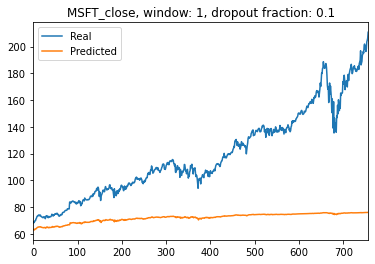

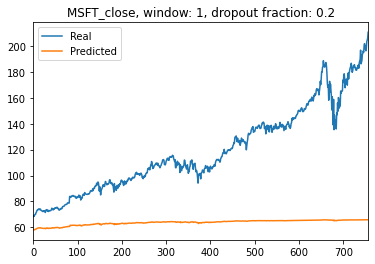

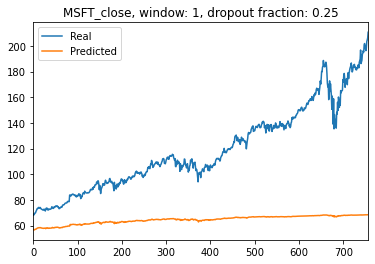

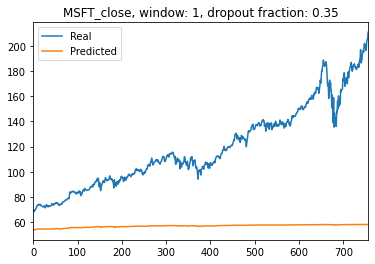

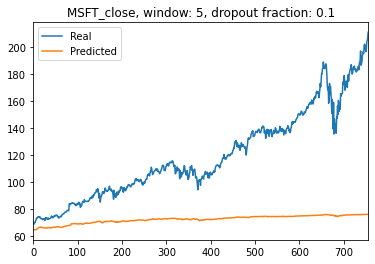

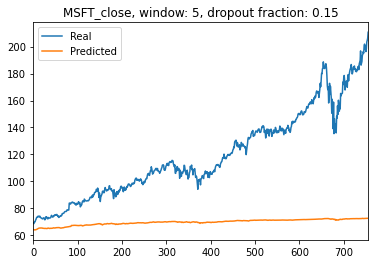

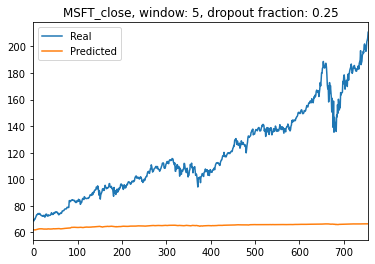

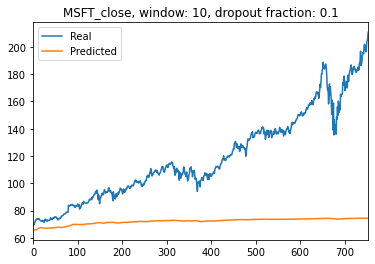

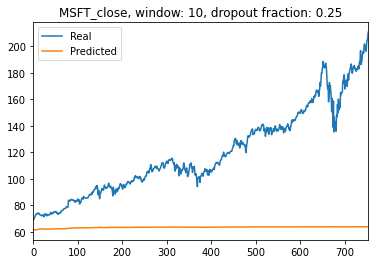

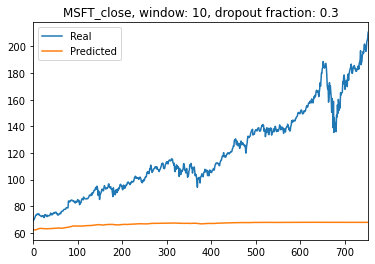

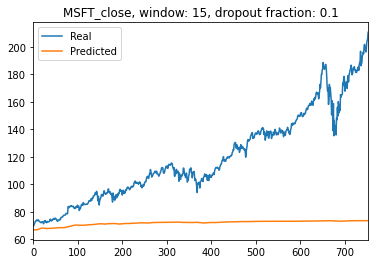

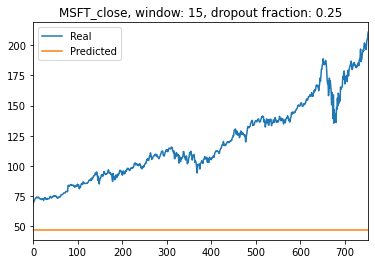

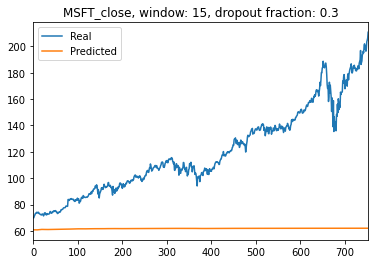

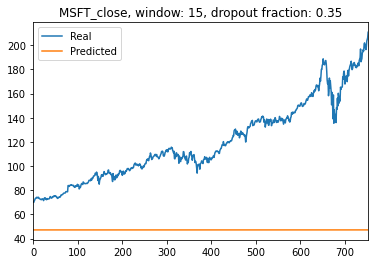

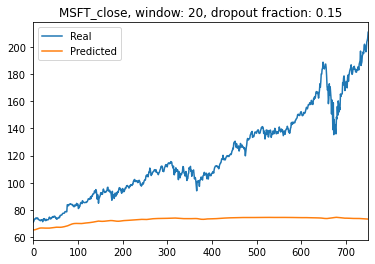

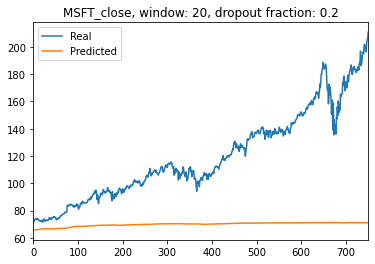

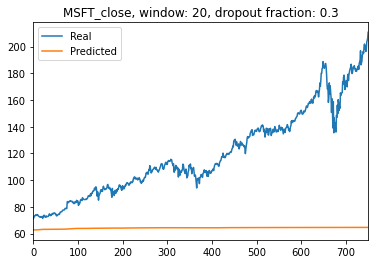

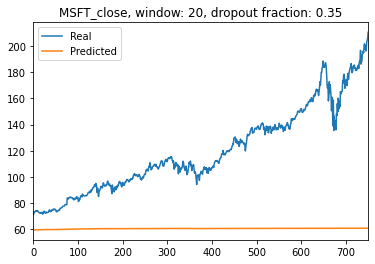

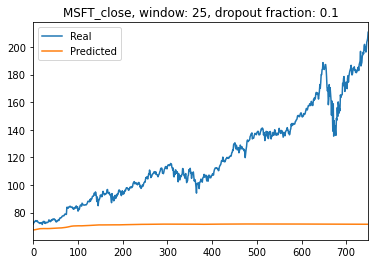

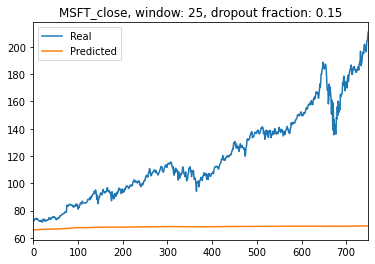

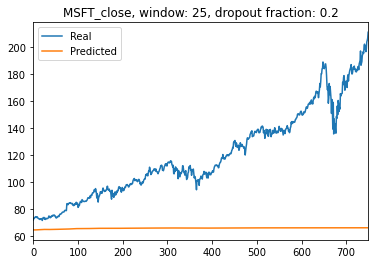

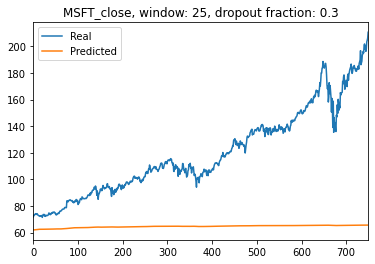

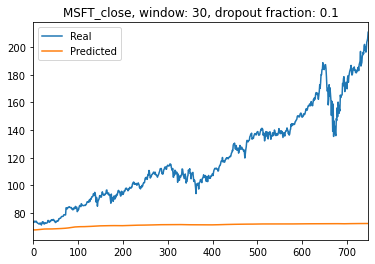

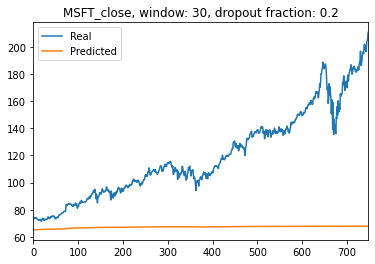

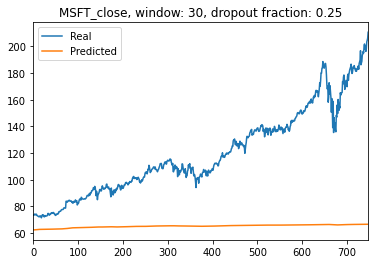

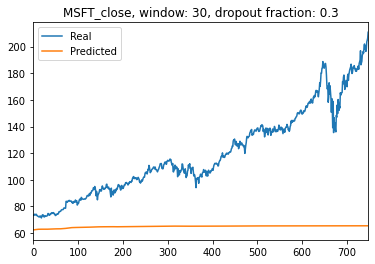

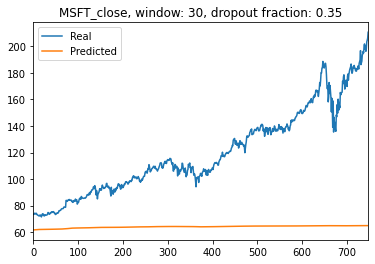

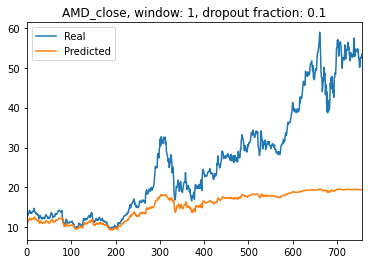

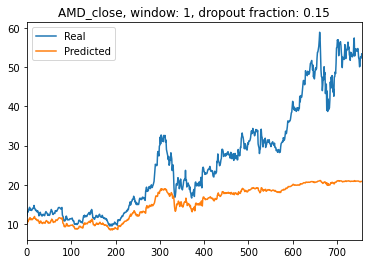

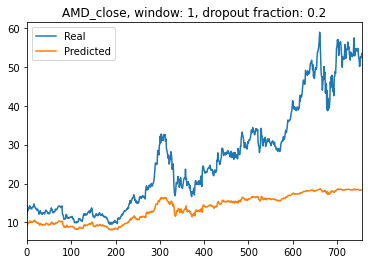

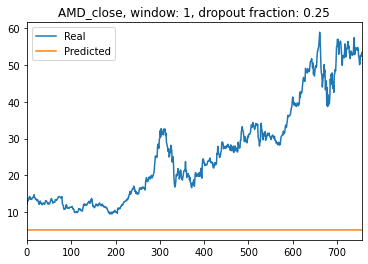

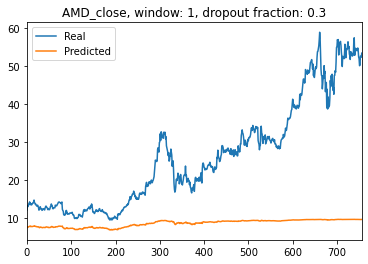

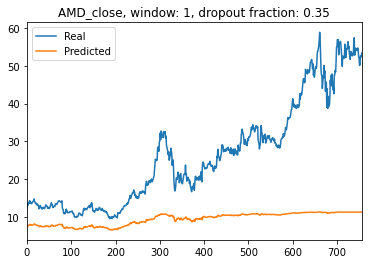

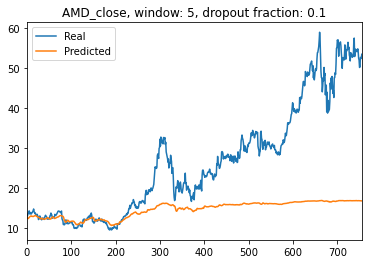

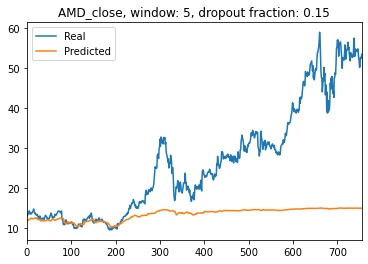

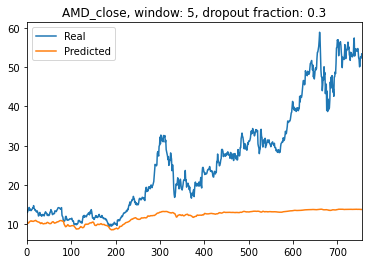

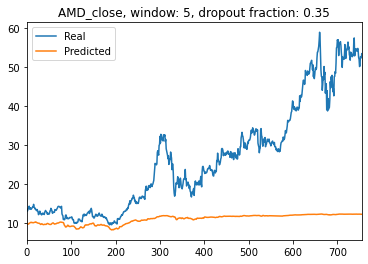

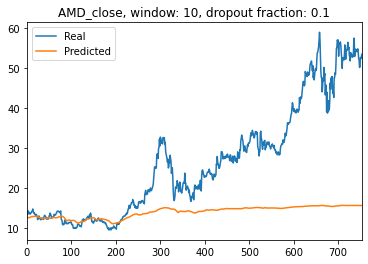

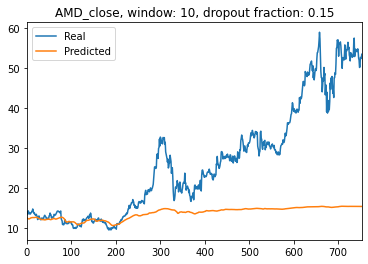

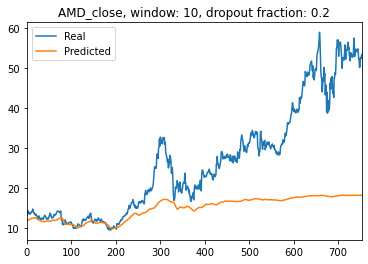

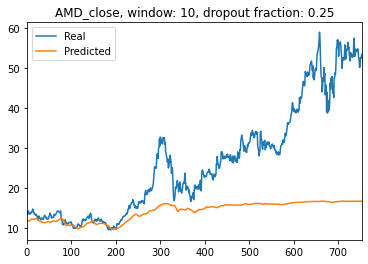

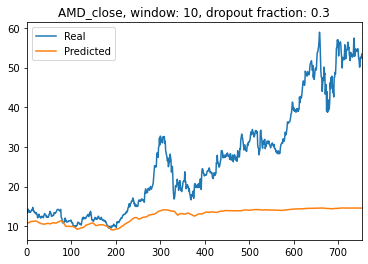

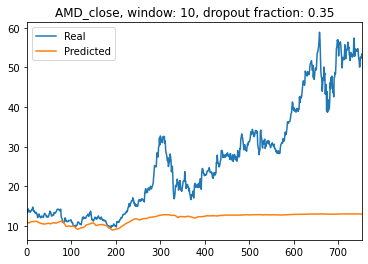

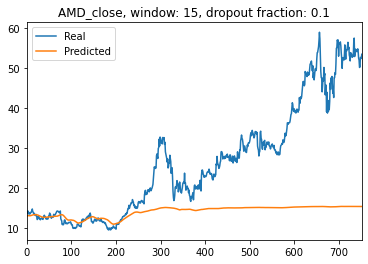

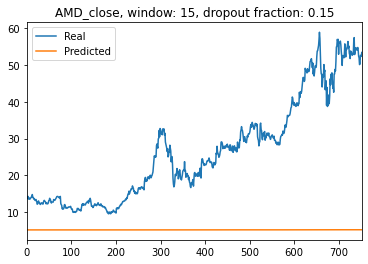

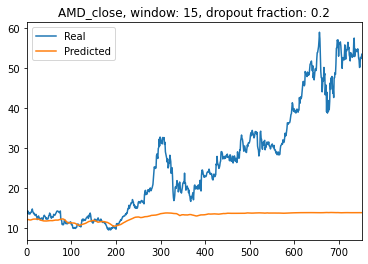

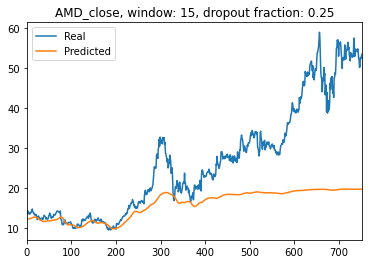

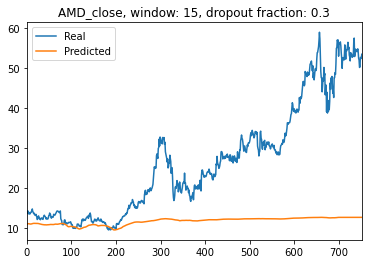

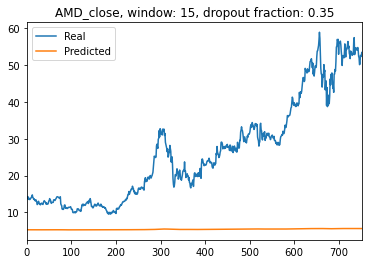

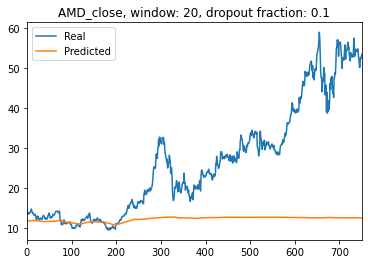

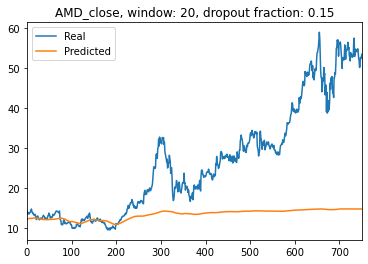

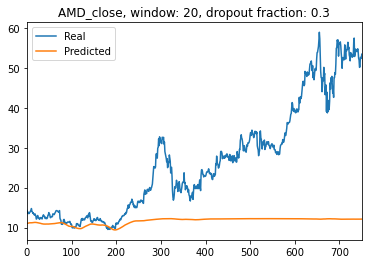

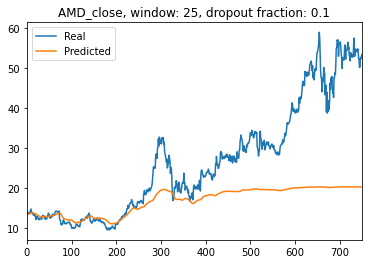

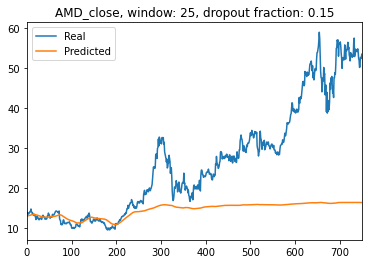

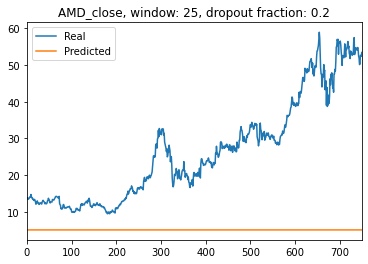

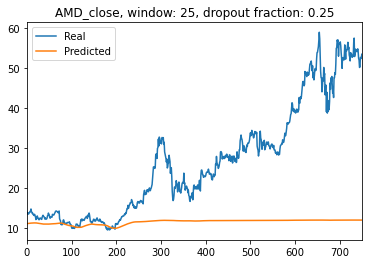

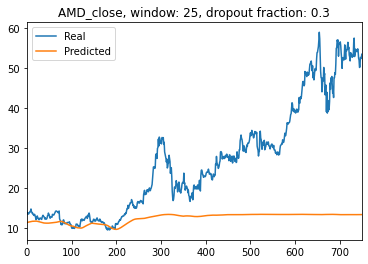

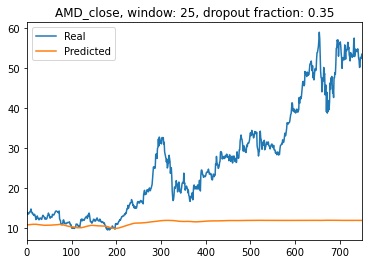

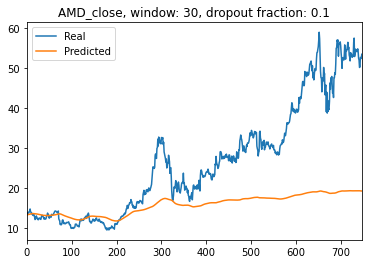

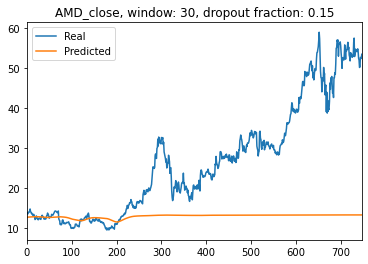

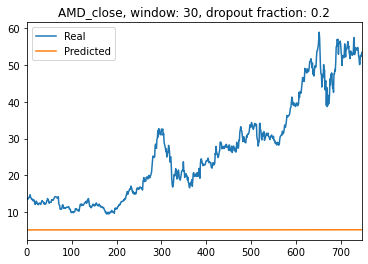

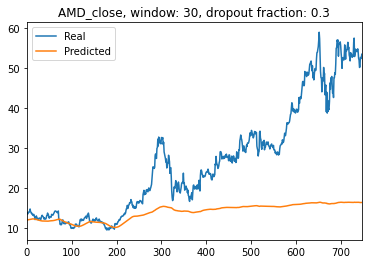

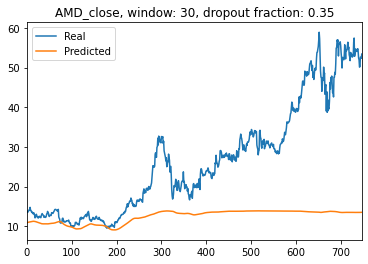

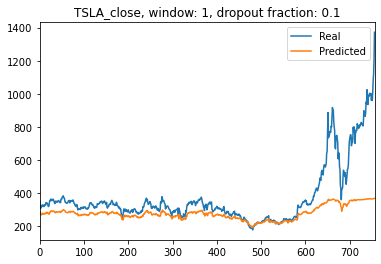

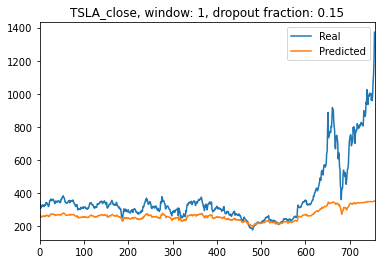

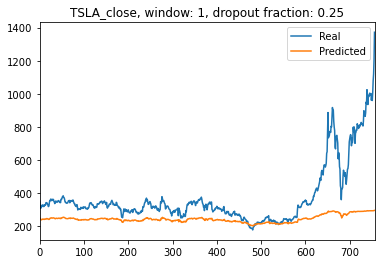

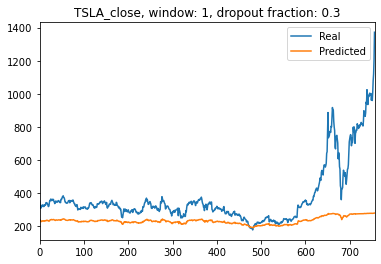

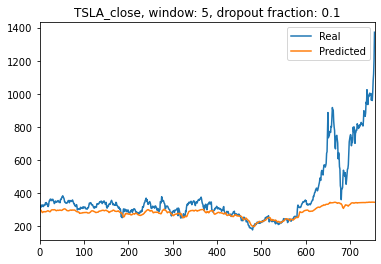

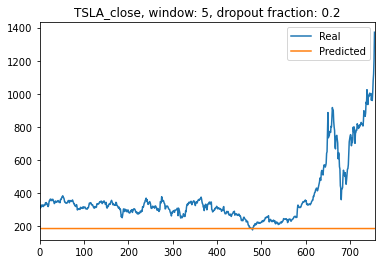

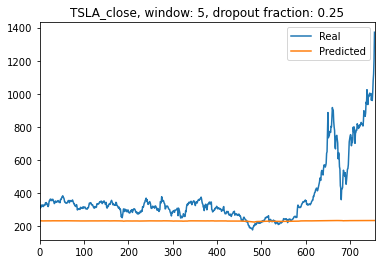

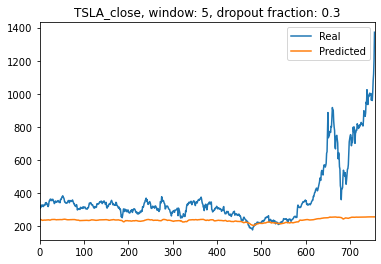

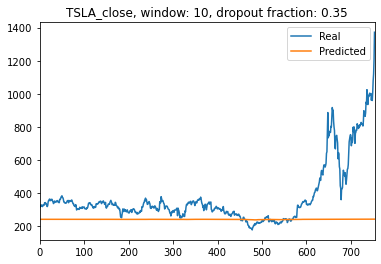

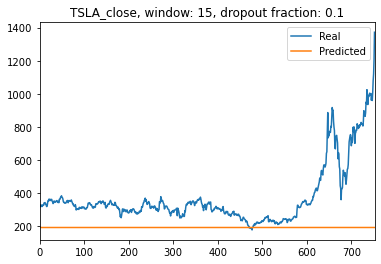

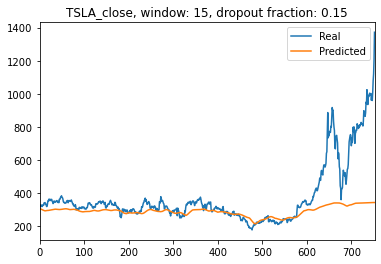

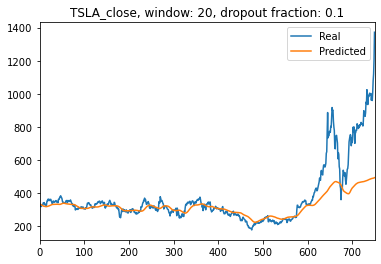

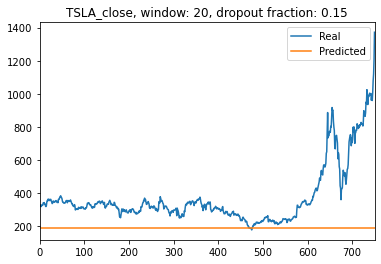

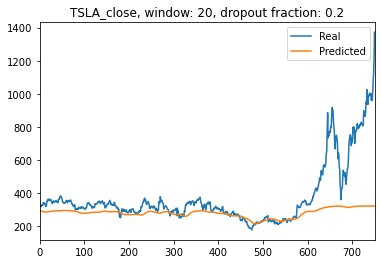

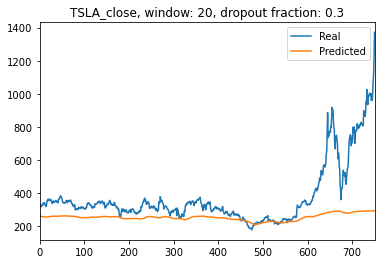

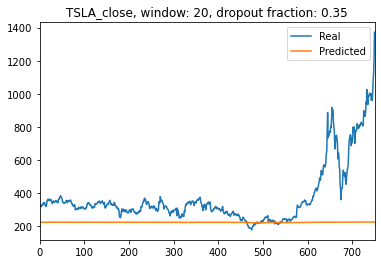

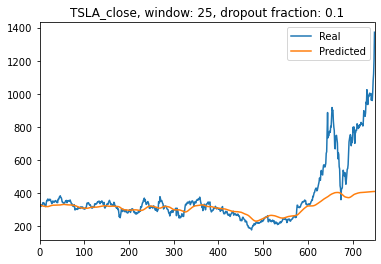

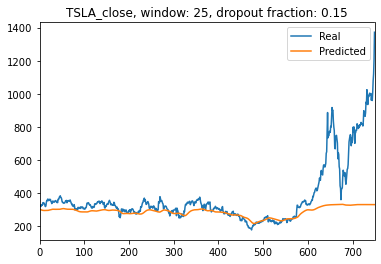

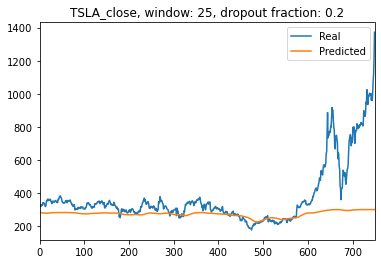

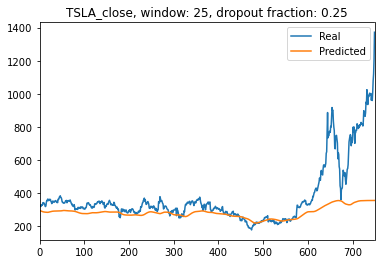

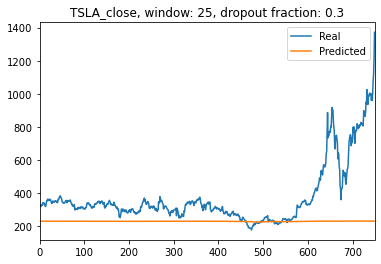

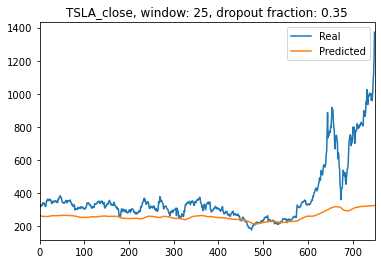

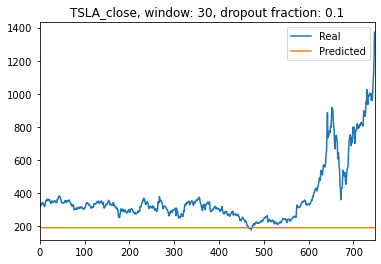

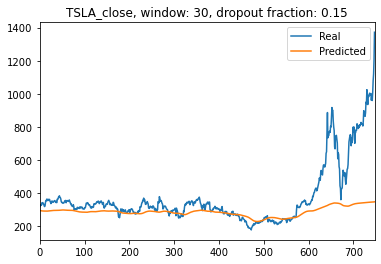

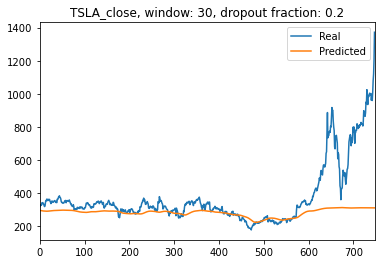

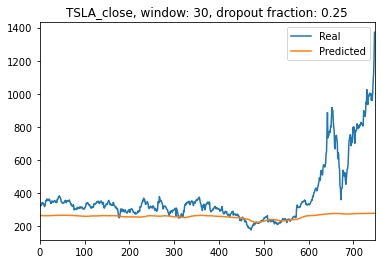

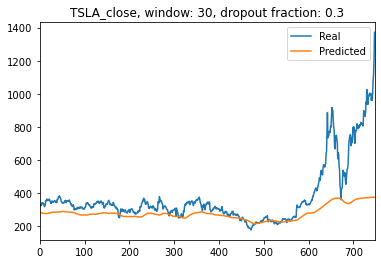

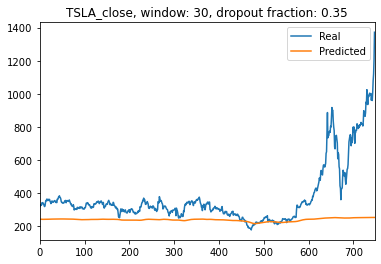

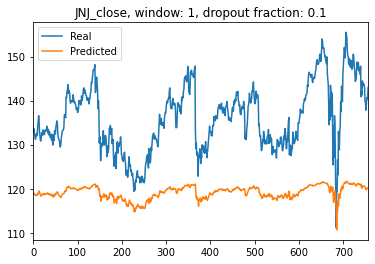

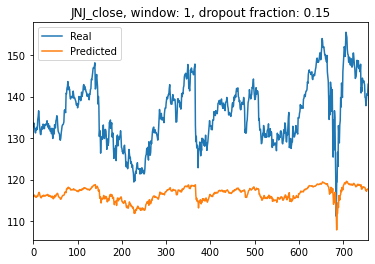

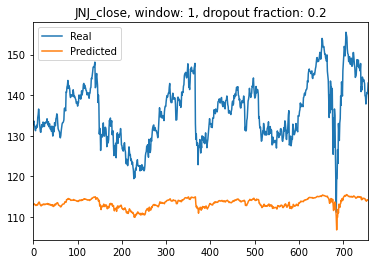

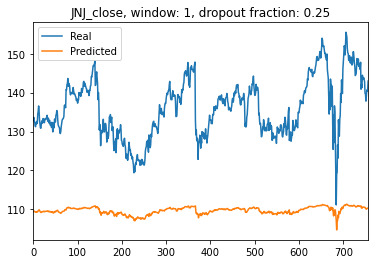

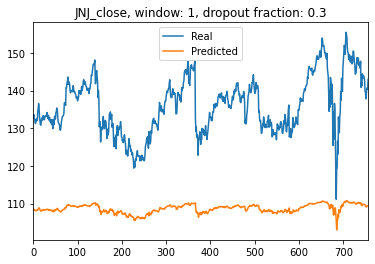

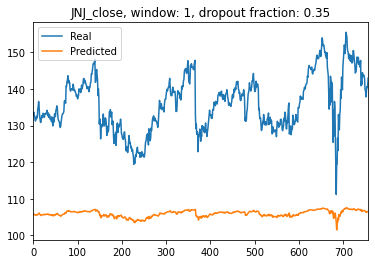

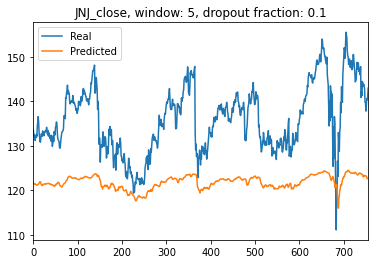

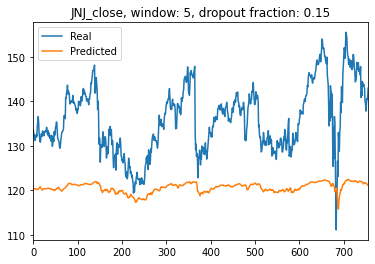

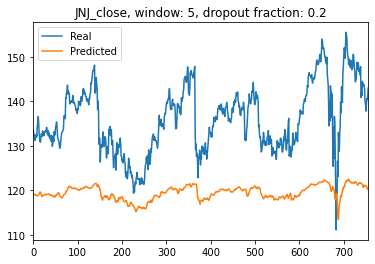

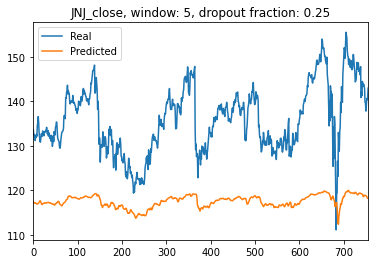

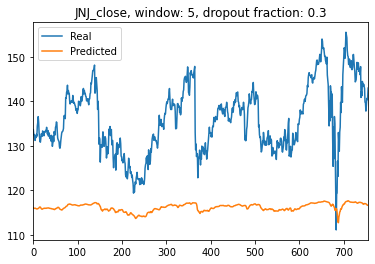

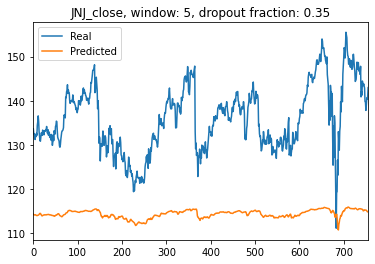

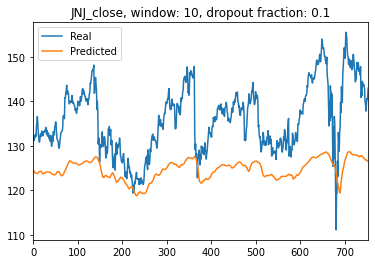

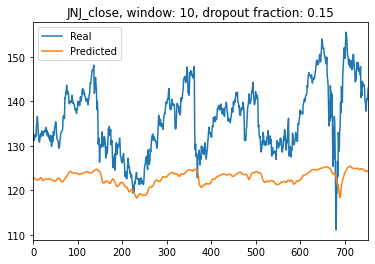

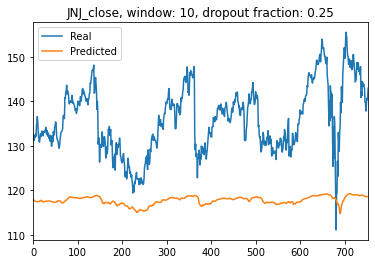

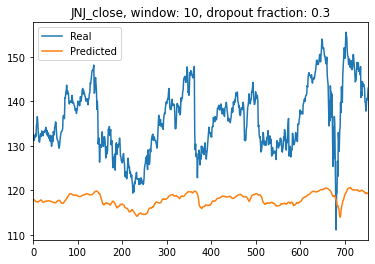

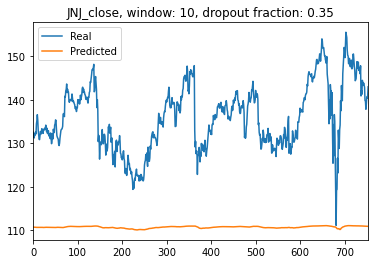

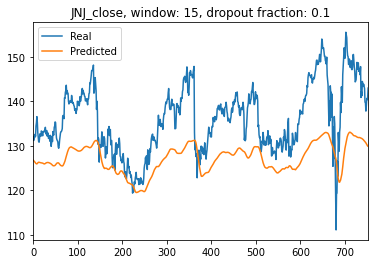

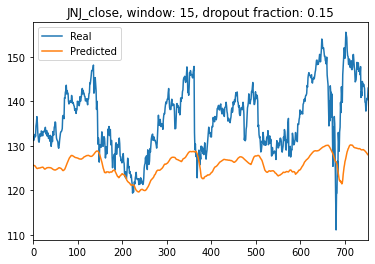

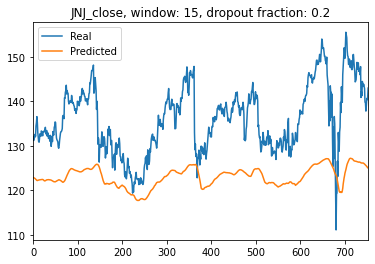

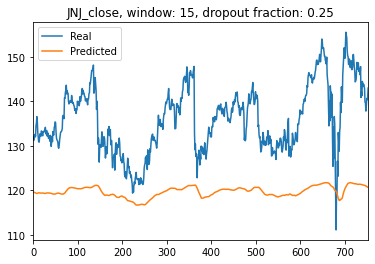

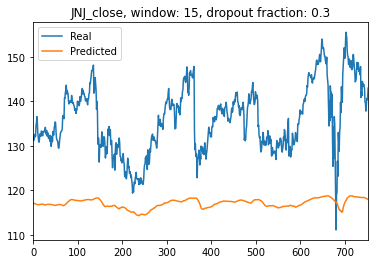

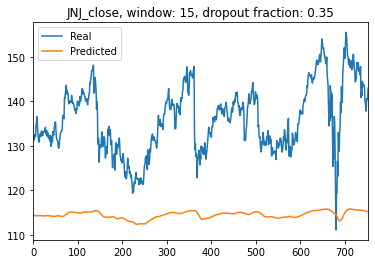

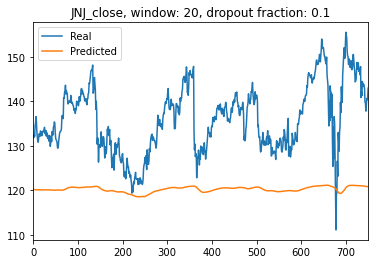

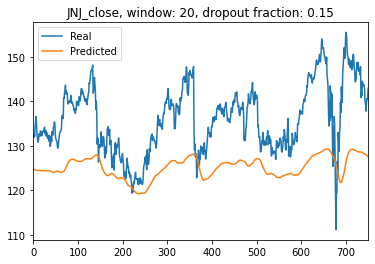

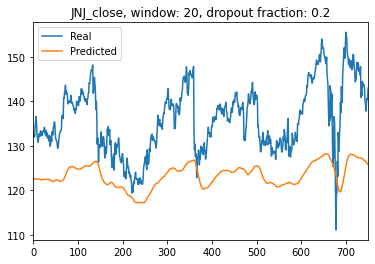

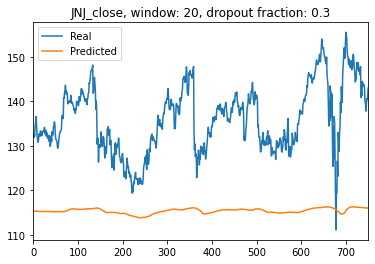

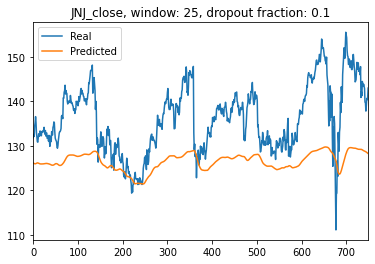

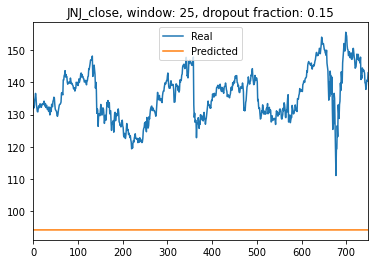

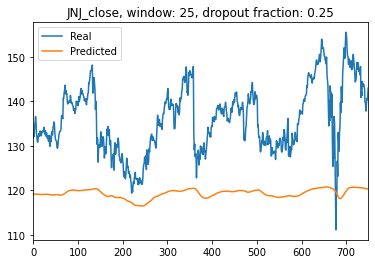

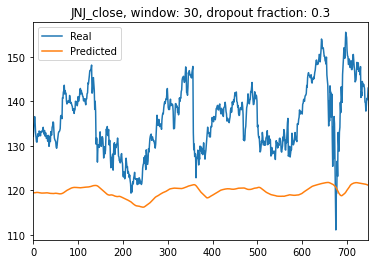

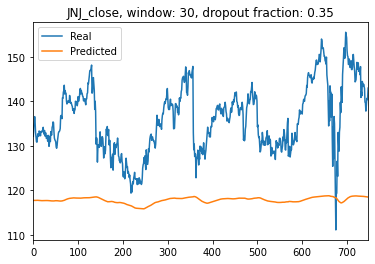

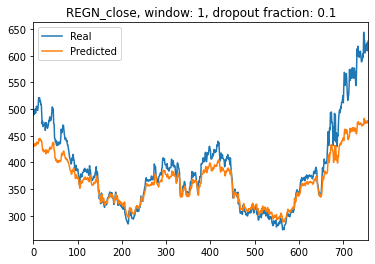

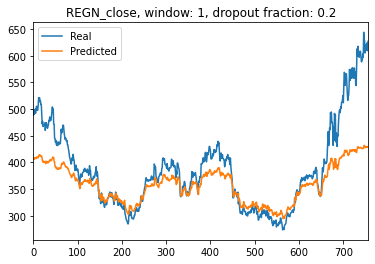

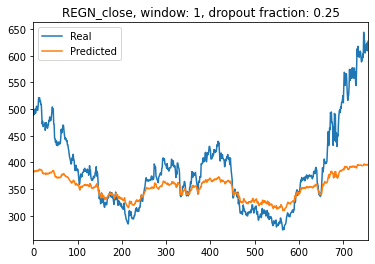

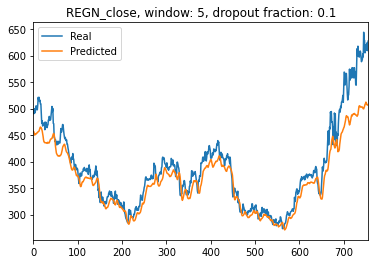

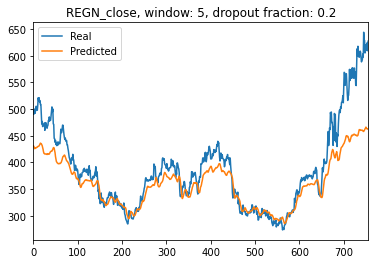

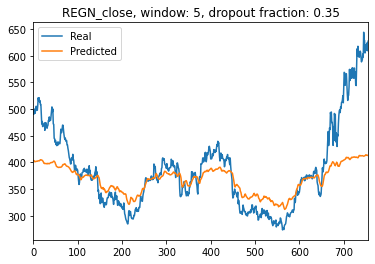

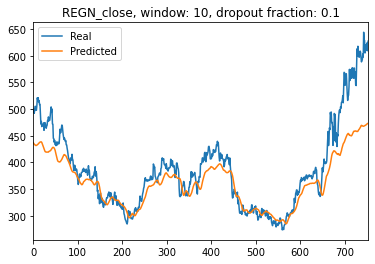

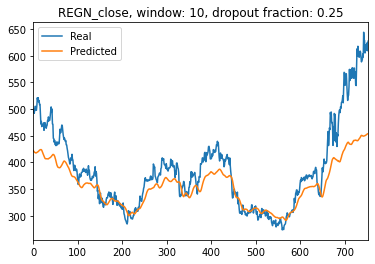

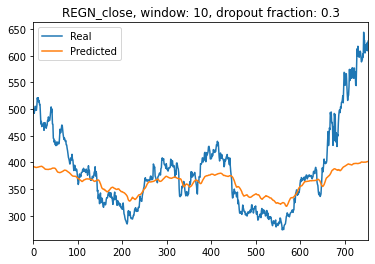

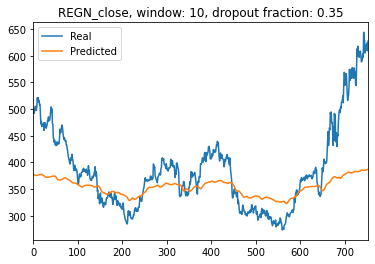

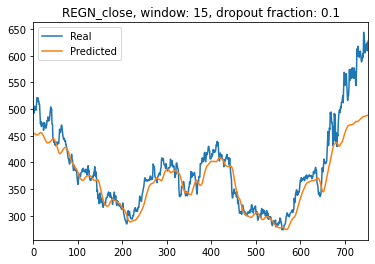

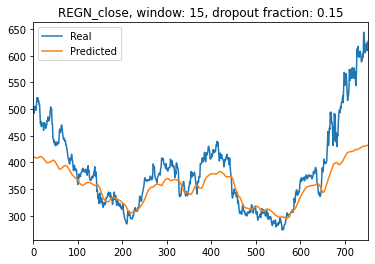

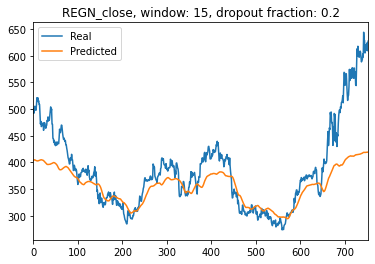

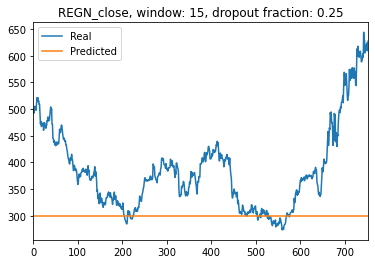

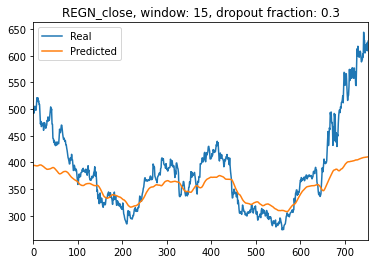

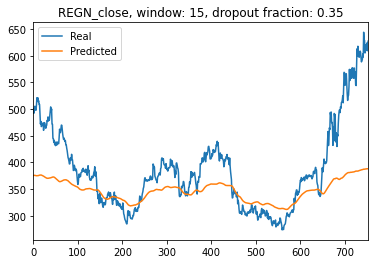

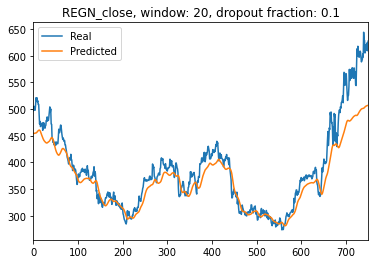

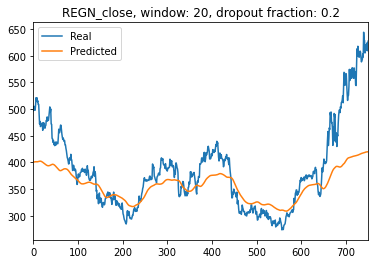

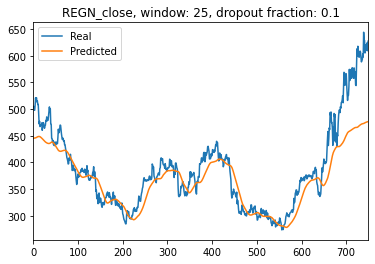

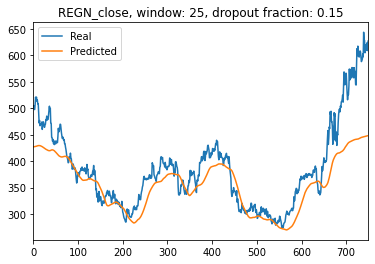

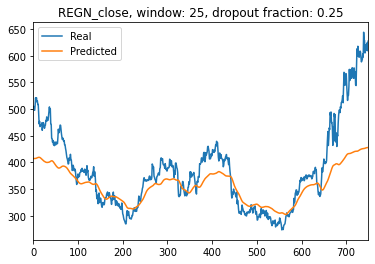

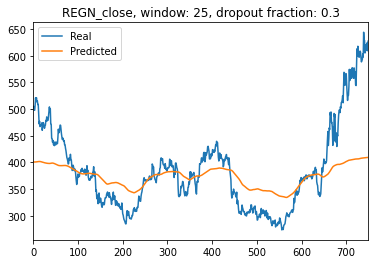

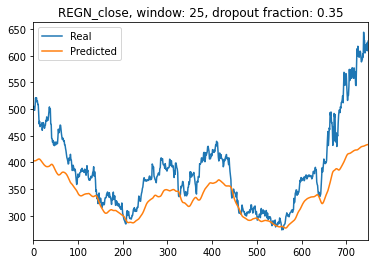

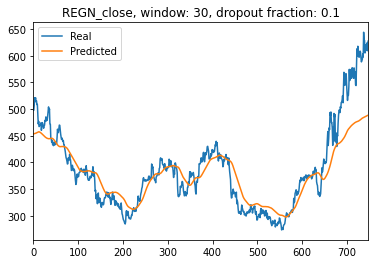

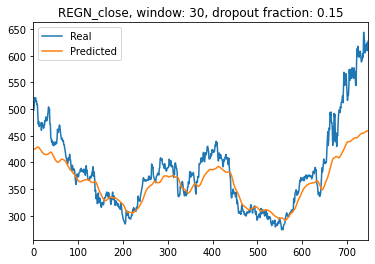

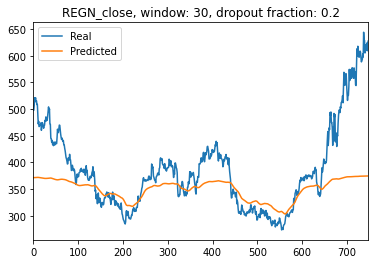

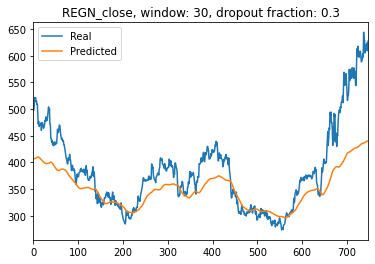

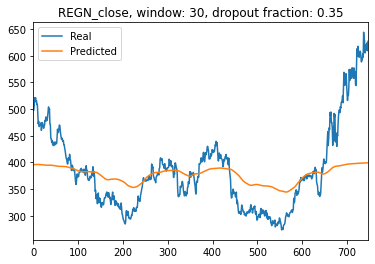

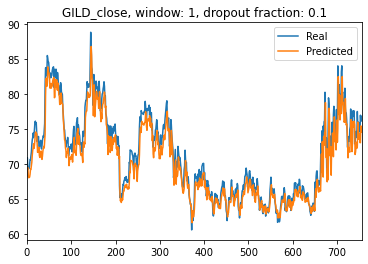

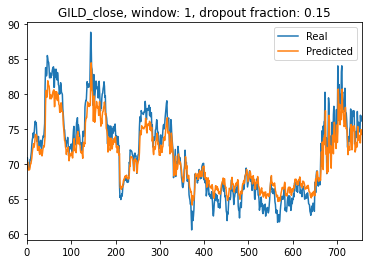

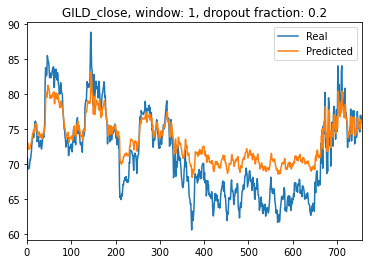

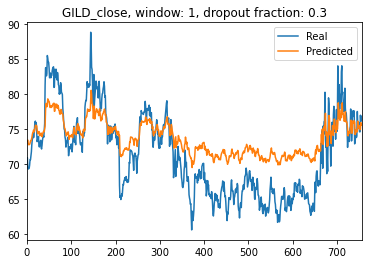

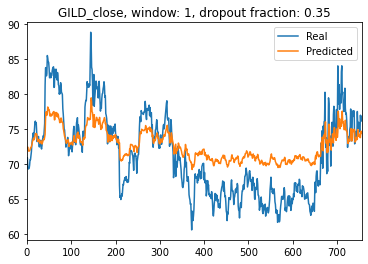

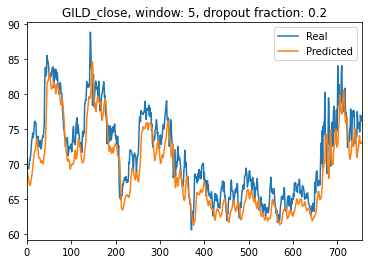

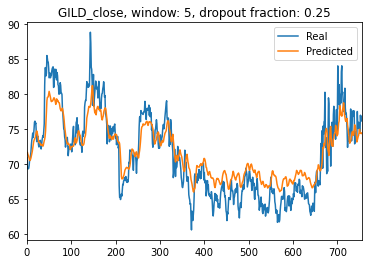

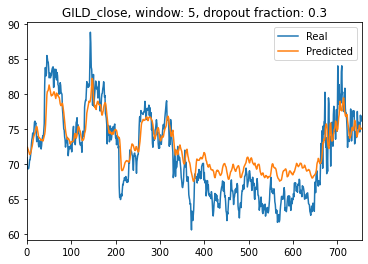

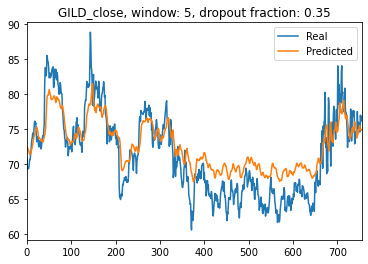

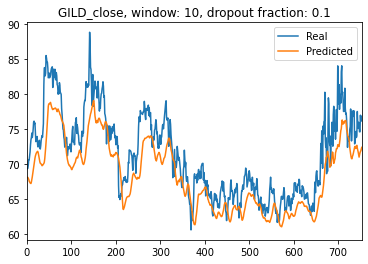

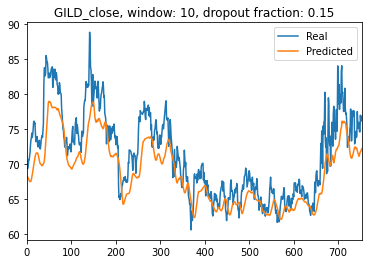

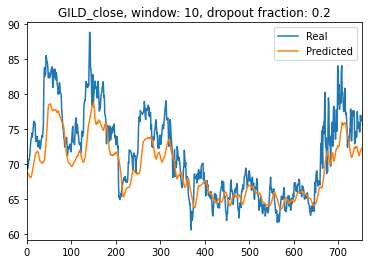

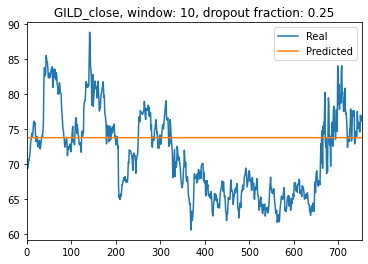

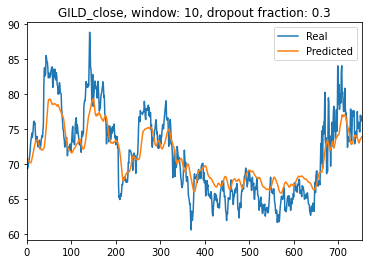

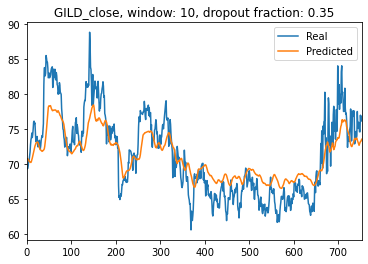

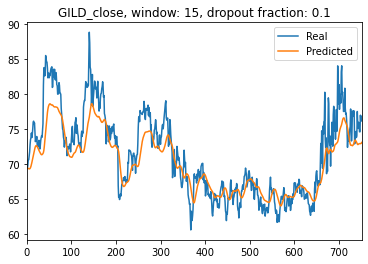

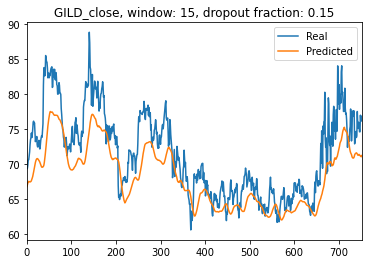

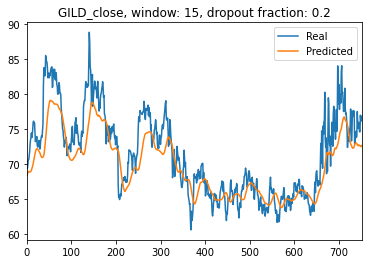

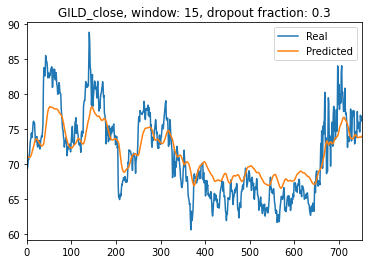

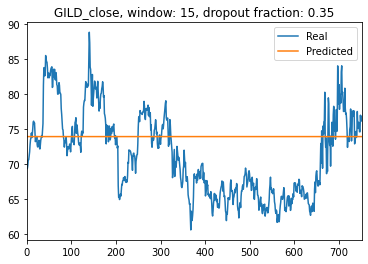

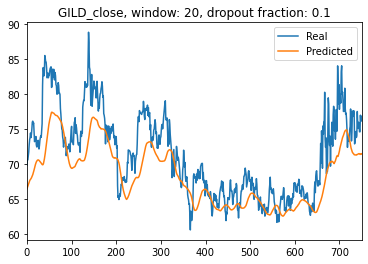

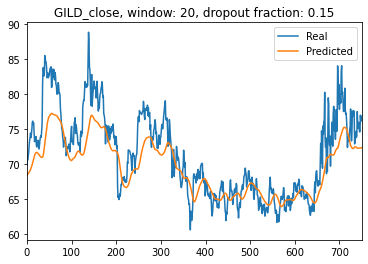

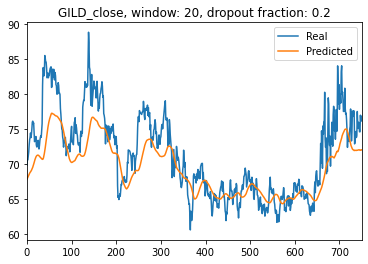

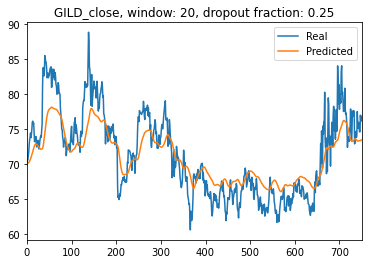

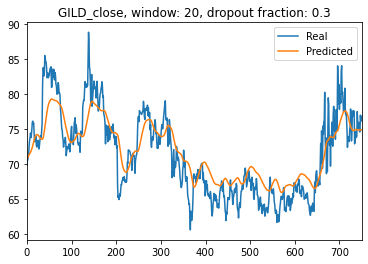

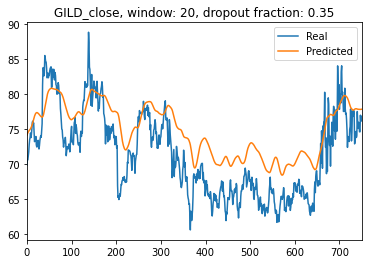

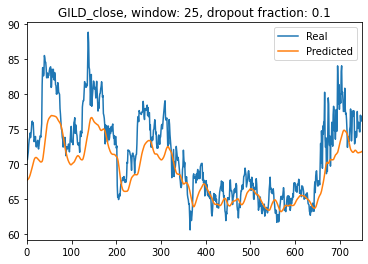

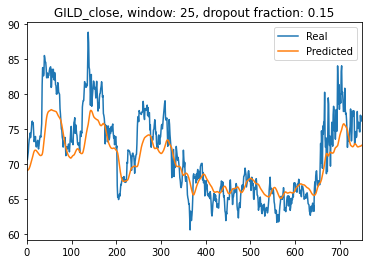

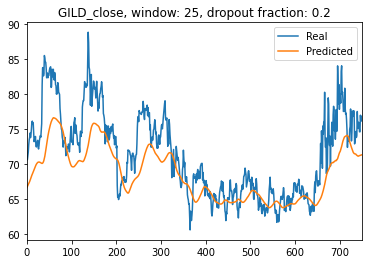

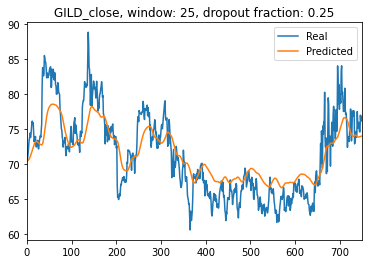

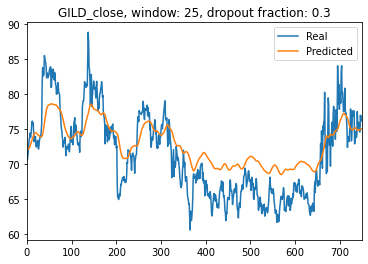

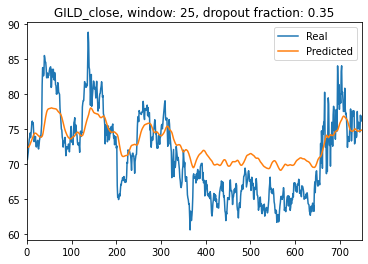

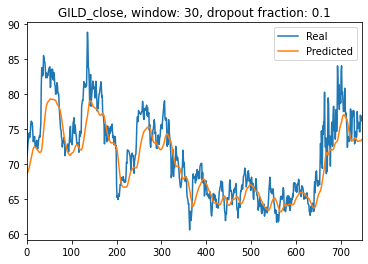

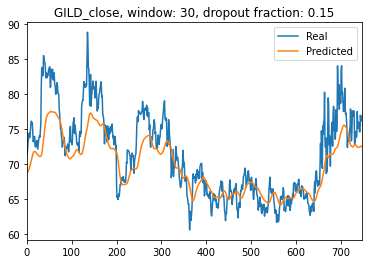

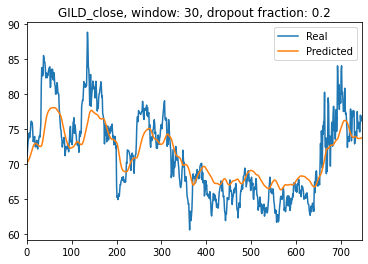

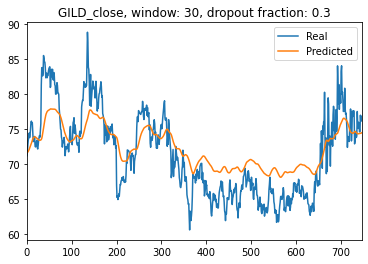

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# import hvplot.pandas
# import matplotlib.pyplot as plt
import time

window_sizes = [1,5,10,15,20,25,30]
stock_list = [0,1,2,3,4,5]
dropout_fractions = [0.1,0.15,0.2,0.25,0.3,0.35]

for stock in stock_list:
    for window_size in window_sizes:
        for dropout_fraction in dropout_fractions:
            feature_column = stock # iterate over this to predict each stock in dataframe
            target_column = stock # iterate over this to predict each stock in dataframe
            X, y = window_data(df, window_size, feature_column, target_column)

            # Use 70% of the data for training and the remainder for testing
            split = int(0.7 * len(X))
            X_train = X[: split - 1]
            X_test = X[split:]
            y_train = y[: split - 1]
            y_test = y[split:]

            # Use the MinMaxScaler to scale data between 0 and 1.
            scaler = MinMaxScaler()
            scaler.fit(X)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            scaler.fit(y)
            y_train = scaler.transform(y_train)
            y_test = scaler.transform(y_test)

            # Reshape the features for the model
            X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

            # Define the LSTM RNN model.
            model = Sequential()
            # Layer 1
            model.add(LSTM(
                units=number_units,
                return_sequences=True,
                input_shape=(X_train.shape[1], 1))
                )
            model.add(Dropout(dropout_fraction))
            # Layer 2
            model.add(LSTM(units=number_units, return_sequences=True))
            model.add(Dropout(dropout_fraction))
            # Layer 3
            model.add(LSTM(units=number_units))
            model.add(Dropout(dropout_fraction))
            # Output layer
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Train the model
            model.fit(X_train, y_train, epochs=30, shuffle=False, batch_size=10, verbose=0)

            # Evaluate the model
            model.evaluate(X_test, y_test, verbose=0)

            # Make some predictions
            predicted = model.predict(X_test)

            # Recover the original prices instead of the scaled version
            predicted_prices = scaler.inverse_transform(predicted)
            real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

            # Create a DataFrame of Real and Predicted values
            stocks = pd.DataFrame({
                "Real": real_prices.ravel(),
                "Predicted": predicted_prices.ravel()
            })

            # Plot the real vs predicted prices as a line chart
            print(f'window size: {window_size}\nstock: {df.columns[stock]}\ndropout fraction: {dropout_fraction}')
            stocks.plot(title=f'{df.columns[stock]}, window: {window_size}, dropout fraction: {dropout_fraction}')

            print(f'MSE:{mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=True)}')
            print(f'RMSE:{mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=False)}')